# Mount the google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Basic Modules

 import BASIC LIbraries,module

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

scikit-learn (Sklearn) is the most useful and robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python.

# Loading Dataset

In [3]:
train_X=np.loadtxt('/content/drive/MyDrive/stress_mini_project/Project/Dataset/train_input.csv',delimiter=",")
train_Y=np.loadtxt('/content/drive/MyDrive/stress_mini_project/Project/Dataset/train_labels.csv')
test_X=np.loadtxt('/content/drive/MyDrive/stress_mini_project/Project/Dataset/test_input.csv',delimiter=",")
test_Y=np.loadtxt('/content/drive/MyDrive/stress_mini_project/Project/Dataset/test_labels.csv')

# Reshape

In [4]:
train_X=train_X.reshape(10000,48,48,1) #reshaping data according to model expectations
train_Y=train_Y.reshape(10000,1)
test_X=test_X.reshape(2000,48,48,1)
test_Y=test_Y.reshape(2000,1)

# Normalization

In [5]:
train_X=train_X/255  #Normalization of pixel data
test_X=test_X/255

# Train Images Display

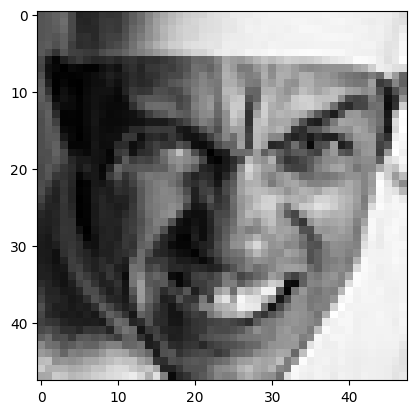

In [6]:
train_index=random.randint(0,9999)
plt.imshow(train_X[train_index,:],cmap='gray')   #traing images
plt.show()

# Test Images Display

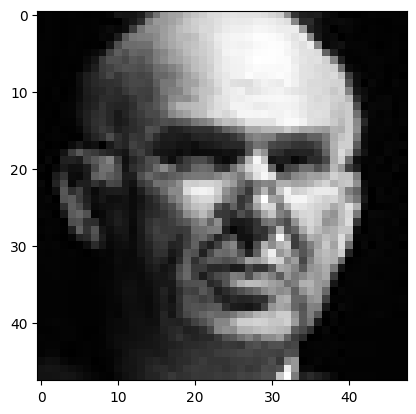

In [7]:
test_index=random.randint(0,1999)   # test images
plt.imshow(test_X[test_index,:],cmap='gray')
plt.show()

# CNN Model

## Importing Modules

KERAS:a neural network Application Programming Interface (API) for Python that is tightly integrated with TensorFlow, which is used to build machine learning models --> The final layers in a CNN are fully (densely) connected layers. In Keras, these layers are created using the Dense() class. -->

In [8]:
from keras.models import Sequential
from keras.layers import Activation,Dropout,Conv2D,Dense
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten

## Model

In [9]:
design=Sequential()   #cnn layers adding
design.add(Conv2D(filters=16, kernel_size=(7, 7), padding='same', input_shape=(48,48,1)))  # features extraction
design.add(BatchNormalization())
design.add(Conv2D(filters=16, kernel_size=(7, 7), padding='same'))
design.add(BatchNormalization())
design.add(Activation('relu'))
design.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
design.add(Dropout(.5))

design.add(Conv2D(filters=32, kernel_size=(5, 5), padding='same'))
design.add(BatchNormalization())
design.add(Conv2D(filters=32, kernel_size=(5, 5), padding='same'))
design.add(BatchNormalization())
design.add(Activation('relu'))
design.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
design.add(Dropout(.5))

design.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
design.add(BatchNormalization())
design.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
design.add(BatchNormalization())
design.add(Activation('relu'))
design.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
design.add(Dropout(.5))

design.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
design.add(BatchNormalization())
design.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
design.add(BatchNormalization())
design.add(Activation('relu'))
design.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
design.add(Dropout(.5))

design.add(Flatten())
design.add(Dense(units=256,activation='relu'))
design.add(Dense(units=128,activation='relu'))
design.add(Dense(units=1,activation='sigmoid'))

design.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
design.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 16)        800       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 16)        12560     
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 16)       64        
 hNormalization)                                                 
                                                                 
 activation (Activation)     (None, 48, 48, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 16)       0

## CNN Model Training

In [ ]:
history=design.fit(train_X,train_Y,epochs=50,batch_size=64,validation_data=(test_X,test_Y)) #all the traing data for one cycle

Epoch 1/50
157/157 [==============================] - 211s 1s/step - loss: 0.2965 - accuracy: 0.8751 - val_loss: 0.2981 - val_accuracy: 0.8885
Epoch 2/50
 80/157 [==============>...............] - ETA: 1:31 - loss: 0.3065 - accuracy: 0.8721

## Save History

In [ ]:
 np.save('/content/drive/MyDrive/stress_mini_project/Project/model/history.npy',history.history)

## Save Model

In [ ]:
design.save('/content/drive/MyDrive/stress_mini_project/Project/model/cnn_stress_model1.h5')

## Load Model

In [ ]:
from keras.models import load_model
load_design=load_model('/content/drive/MyDrive/stress_mini_project/Project/model/cnn_stress_model1.h5')

## Model Testing

In [ ]:
cnn_accuracy=load_design.evaluate(test_X,test_Y)[1]
print("CNN Accuracy:",cnn_accuracy)

63/63 [==============================] - 14s 218ms/step - loss: 7.4650 - accuracy: 0.5000
CNN Accuracy: 0.5


## Make Prediction from CNN Model

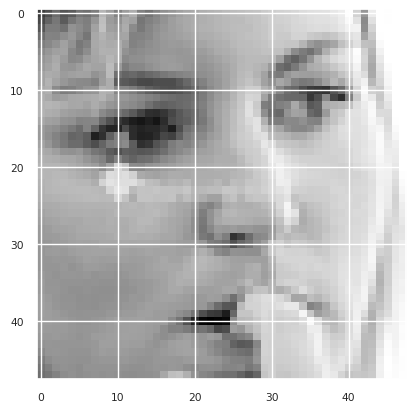

1/1 [==============================] - 0s 211ms/step
[[1.7105247e-08]]

 Non-Stress Person 




In [ ]:
index=random.randint(0,1999)
plt.imshow(test_X[index,:],cmap='gray')
plt.show()
prediction_s=load_design.predict(test_X[index,:].reshape(1,48,48,1))
print(prediction_s)
#prediction=prediction>0.5
#if prediction==1:
if prediction_s >0.5:     # if image pixels value > 0.5 then stress person
  print("\n Stress Person \n\n")
else:
  print("\n Non-Stress Person \n\n")

Precision, Recall and F1 Score

In [ ]:
y_pred = load_design.predict(test_X)>0.5

63/63 [==============================] - 9s 148ms/step


In [ ]:
# Calculateing precision, recall, and F1 score for my model
precision_s = precision_score(test_Y, y_pred, average='weighted')
recall_s = recall_score(test_Y, y_pred, average='weighted')
f1_s = f1_score(test_Y, y_pred, average='weighted')

# Print the results
print("Precision: {:.3f}".format(precision_s))
print("Recall: {:.3f}".format(recall_s))
print("F1 score: {:.3f}".format(f1_s))

Precision: 0.250
Recall: 0.500
F1 score: 0.333


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix

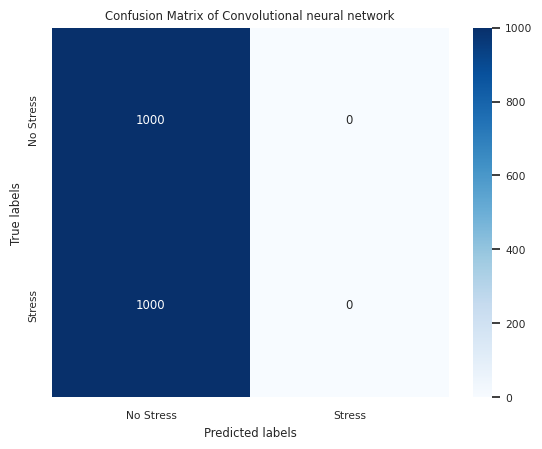

In [ ]:
import seaborn as sns
# Compute the confusion matrix
cm = confusion_matrix(test_Y, y_pred, labels=[0, 1])

# Visualize confusion matrix using heatmap
sns.set(font_scale=0.7)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of Convolutional neural network')
# Fix x and y axis tick labels
tick_labels = ['No Stress', 'Stress']
plt.xticks(np.arange(len(tick_labels))+0.5, tick_labels)
plt.yticks(np.arange(len(tick_labels))+0.5, tick_labels)

plt.show()

Webcam

In [ ]:

# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:
#initialize the Haar Cas#cade face detection model

In [ ]:
# function that convert the JavaScript object into an OpenCV img
def js_to_img(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  img_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(img_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

Haar Cascade Classifier For this tutorial we will run a simple object detection algorithm called Haar Cascade on our images and video fetched from our webcam. OpenCV has a pre-trained Haar Cascade face detection model.

In [ ]:
# initialize the Haar Cascade face detection model
f_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_img(data)
  # grayscale img
  gray_scale = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray_scale.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = f_cascade.detectMultiScale(gray_scale)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename


  # save image
  #cv2.imwrite(filename, img)

  #return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


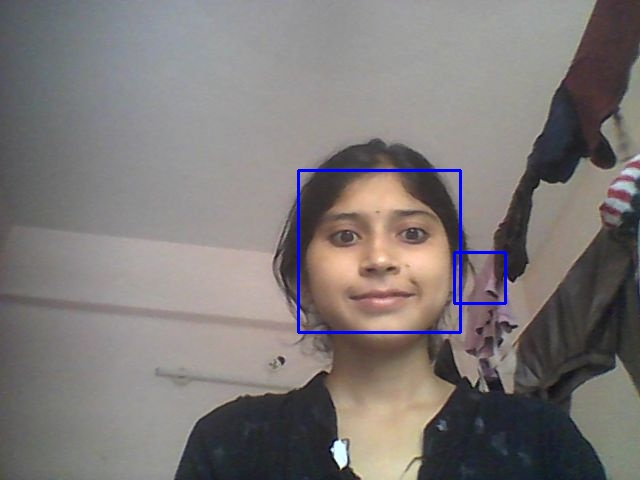

In [ ]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
import cv2

In [ ]:
frame=cv2.imread("/content/photo.jpg")

gray_s = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [ ]:
#normalized
#img_normalized = cv2.normalize(img, None, 0, 1.0,
#cv2.NORM_MINMAX, dtype=cv2.CV_32F)


In [ ]:
new=gray_s/255


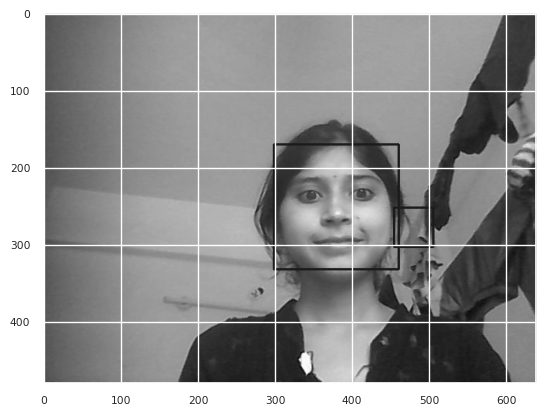

1/1 [==============================] - 0s 35ms/step
[[0.48588115]]

 Non-Stress Person 




In [ ]:

import matplotlib.pyplot as plt

# Assuming you have the image data stored in the `new` variable

plt.imshow(new, cmap='gray')
plt.show()

new_resized = cv2.resize(new, (48, 48), interpolation=cv2.INTER_LINEAR)
new = np.reshape(new_resized, (1, 48, 48, 1))

prediction_s = load_design.predict(new)
print(prediction_s)

#prediction = prediction > 0.5
if prediction_s > 0.5:
    print("\n Stress Person \n\n")
else:
    print("\n Non-Stress Person \n\n")

Plot


In [ ]:
import matplotlib.pyplot as plt

DECISION TREE

In [ ]:
#checking different algorithms to compare accuracy

Importing Modules

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
train_X=train_X.reshape(10000,48*48*1)
train_Y=train_Y.reshape(10000,1)
test_X=test_X.reshape(2000,48*48*1)
test_Y=test_Y.reshape(2000,1)

In [ ]:
#Decision tree model

Decision tree model

In [ ]:
DTC = DecisionTreeClassifier()
DTC.fit(train_X, train_Y)

DecisionTreeClassifier()

In [ ]:
y_pred = DTC.predict(test_X)
DTC_ACC=accuracy_score(test_Y, y_pred)
print("Decision Tree Accuracy:",DTC_ACC)

Decision Tree Accuracy: 0.735


Precision, Recall and F1 Score


In [ ]:
# Calculate precision, recall, and F1 score
precision_D = precision_score(test_Y, y_pred, average='weighted')
recall_D = recall_score(test_Y, y_pred, average='weighted')
f1_D = f1_score(test_Y, y_pred, average='weighted')

# Print the results
print("Precision: {:.3f}".format(precision_D))
print("Recall: {:.3f}".format(recall_D))
print("F1 score: {:.3f}".format(f1_D))

Precision: 0.737
Recall: 0.735
F1 score: 0.735


Confusion Matrix

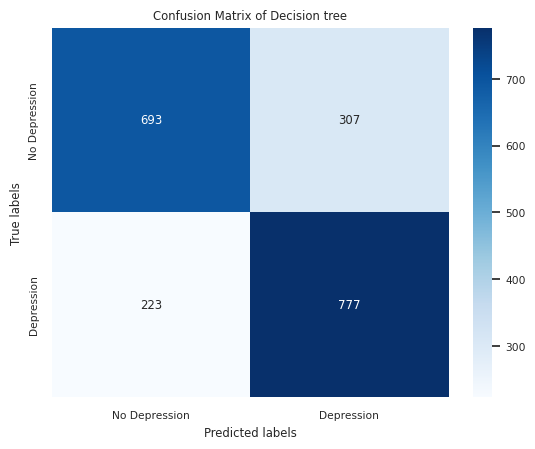

In [ ]:
import seaborn as sns
# Compute the confusion matrix
cm = confusion_matrix(test_Y, y_pred, labels=[0, 1])

# Visualize confusion matrix using heatmap
sns.set(font_scale=0.7)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of Decision tree')
# Fix x and y axis tick labels
tick_labels = ['No stress', 'stress']
plt.xticks(np.arange(len(tick_labels))+0.5, tick_labels)
plt.yticks(np.arange(len(tick_labels))+0.5, tick_labels)

plt.show()


Plot Learning curve and Validation curve

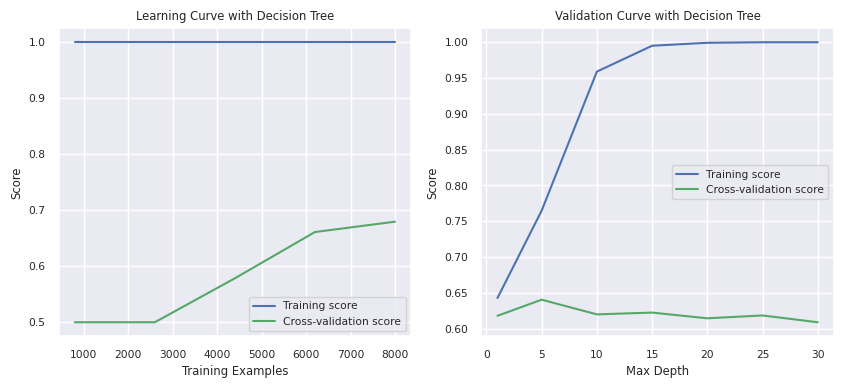

In [ ]:
# Create figure and axes objects
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

train_sizes, train_scores, test_scores = learning_curve(DTC, train_X, train_Y, cv=5, n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

ax1.set_title("Learning Curve with Decision Tree")
ax1.set_xlabel("Training Examples")
ax1.set_ylabel("Score")
ax1.plot(train_sizes, train_scores_mean, color="b", label="Training score")
ax1.plot(train_sizes, test_scores_mean, color="g", label="Cross-validation score")
ax1.legend(loc="best")

# plot the validation curve
param_range = [1, 5, 10, 15, 20, 25, 30]
train_scores, test_scores = validation_curve(DTC, test_X, test_Y, param_name="max_depth", param_range=param_range, cv=5, n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

ax2.set_title("Validation Curve with Decision Tree")
ax2.set_xlabel("Max Depth")
ax2.set_ylabel("Score")
ax2.plot(param_range, train_scores_mean, color="b", label="Training score")
ax2.plot(param_range, test_scores_mean, color="g", label="Cross-validation score")
ax2.legend(loc="best")

plt.show()


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
RFC = RandomForestClassifier(n_estimators=100, random_state=42)
RFC.fit(train_X, np.ravel(train_Y))

RandomForestClassifier(random_state=42)

Model Testing

In [ ]:
y_pred = RFC.predict(test_X)
RFC_acc=accuracy_score(test_Y, y_pred)
print("Random Forest Accuracy:",RFC_acc)

Random Forest Accuracy: 0.799


Precision, Recall and F1 Score

In [ ]:

# Calculate precision, recall, and F1 score
precision_r = precision_score(test_Y, y_pred, average='weighted')
recall_r = recall_score(test_Y, y_pred, average='weighted')
f1_r = f1_score(test_Y, y_pred, average='weighted')

# Print the results
print("Precision: {:.3f}".format(precision_r))
print("Recall: {:.3f}".format(recall_r))
print("F1 score: {:.3f}".format(f1_r))

Precision: 0.800
Recall: 0.799
F1 score: 0.799


Confusion Matrix

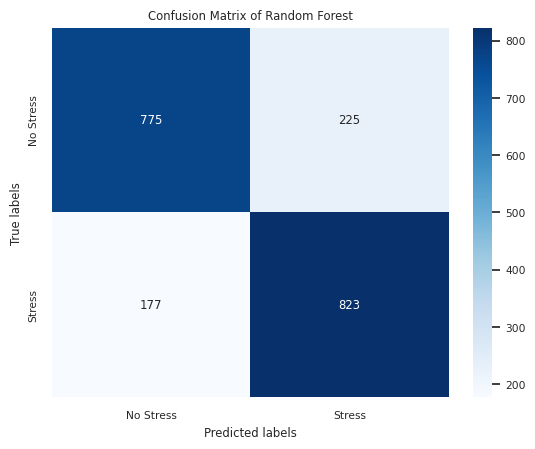

In [ ]:
import seaborn as sns
# Compute the confusion matrix
cm = confusion_matrix(test_Y, y_pred, labels=[0, 1])

# Visualize confusion matrix using heatmap
sns.set(font_scale=0.7)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of Random Forest')
# Fix x and y axis tick labels
tick_labels = ['No Stress', 'Stress']
plt.xticks(np.arange(len(tick_labels))+0.5, tick_labels)
plt.yticks(np.arange(len(tick_labels))+0.5, tick_labels)

plt.show()


In [ ]:
#Plot Learning curve and Validation curve

In [ ]:
# Create figure and axes objects
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

train_sizes, train_scores, test_scores = learning_curve(RFC, train_X, train_Y, cv=5, n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

ax1.set_title("Learning Curve with Random Forest")
ax1.set_xlabel("Training Examples")
ax1.set_ylabel("Score")
ax1.plot(train_sizes, train_scores_mean, color="b", label="Training score")
ax1.plot(train_sizes, test_scores_mean, color="g", label="Cross-validation score")
ax1.legend(loc="best")

# plot the validation curve
param_range = [1, 5, 10, 15, 20]
train_scores, test_scores = validation_curve(RFC, test_X, test_Y, param_name="max_depth", param_range=param_range, cv=5, n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

ax2.set_title("Validation Curve with Random Forest")
ax2.set_xlabel("Max Depth")
ax2.set_ylabel("Score")
ax2.plot(param_range, train_scores_mean, color="b", label="Training score")
ax2.plot(param_range, test_scores_mean, color="g", label="Cross-validation score")
ax2.legend(loc="best")

plt.show()





Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Logistic Regression Model

In [ ]:
LR = LogisticRegression(max_iter=2000, random_state=42)
LR.fit(train_X, np.ravel(train_Y))

ValueError: ignored

Model Testing

In [ ]:
Vy_pred = LR.predict(test_X)
logreg_acc=accuracy_score(test_Y, y_pred)
print("Logistic Regression Accuracy:",logreg_acc)

Precision, Recall and F1 Score

In [ ]:
# Calculate precision, recall, and F1 score
precision = precision_score(test_Y, y_pred, average='weighted')
recall = recall_score(test_Y, y_pred, average='weighted')
f1 = f1_score(test_Y, y_pred, average='weighted')

# Print the results
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 score: {:.3f}".format(f1))

Precision: 0.800
Recall: 0.799
F1 score: 0.799


Confusion Matrix

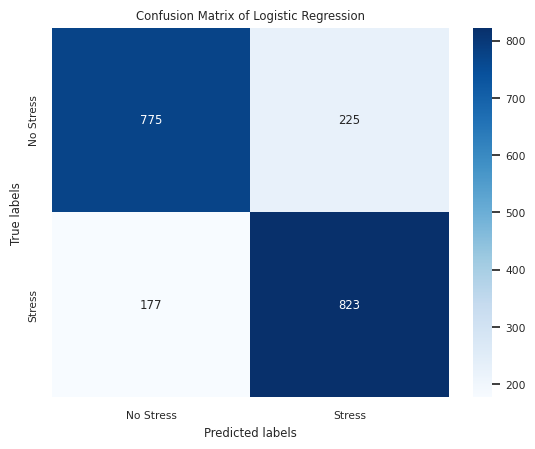

In [ ]:
import seaborn as sns
# Compute the confusion matrix
cm = confusion_matrix(test_Y, y_pred, labels=[0, 1])

# Visualize confusion matrix using heatmap
sns.set(font_scale=0.7)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of Logistic Regression')
# Fix x and y axis tick labels
tick_labels = ['No Stress', 'Stress']
plt.xticks(np.arange(len(tick_labels))+0.5, tick_labels)
plt.yticks(np.arange(len(tick_labels))+0.5, tick_labels)

plt.show()


Plot Learning curve and Validation curve

In [ ]:
#Create figure and axes objects
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# plot the learning curve

# Define the training sizes to use
train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes, train_scores, test_scores = learning_curve(LR,train_X, np.ravel(train_Y), train_sizes=train_sizes, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the training and test scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

ax1.set_title("Learning Curve with Logistic Regression")
ax1.set_xlabel("Training set size")
ax1.set_ylabel("Accuracy")
ax1.plot(train_sizes, train_mean, color="b", label="Training score")
ax1.plot(train_sizes, test_mean, color="g", label="Cross-validation score")
ax1.legend(loc="best")

# plot the validation curve
param_range = np.logspace(-3, 3, 5)
train_scores, test_scores = validation_curve(LR, test_X, np.ravel(test_Y),param_name="C", param_range=param_range, cv=5, scoring="accuracy")
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

ax2.set_title("Validation Curve with Logistic Regression")
ax2.set_xlabel("C")
ax2.set_ylabel("Accuracy")
ax2.plot(param_range, train_mean, label="Training score", color="b")
ax2.plot(param_range, test_mean, label="Cross-validation score", color="g")
ax2.legend(loc="best")

plt.show()



Naive Bayes

Model Testing

Precision, Recall and F1 Score

Confusion Matrix

Plot Learning curve and Validation curve

Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

SVM Model

In [ ]:
svm_s = SVC(kernel='rbf')
svm_s.fit(train_X, np.ravel(train_Y))

In [ ]:
y_pred = svm_s.predict(test_X)
svm_acc=accuracy_score(test_Y, y_pred)
print("SVM Accuracy:",svm_acc)

Precision, Recall and F1 Score

In [ ]:
# Calculate precision, recall, and F1 score
precision_svm = precision_score(test_Y, y_pred, average='weighted')
recall_svm = recall_score(test_Y, y_pred, average='weighted')
f1_svm = f1_score(test_Y, y_pred, average='weighted')

# Print the results
print("Precision: {:.3f}".format(precision_svm))
print("Recall: {:.3f}".format(recall_svm))
print("F1 score: {:.3f}".format(f1_svm))

Confusion Matrix

In [ ]:
import seaborn as sns
# Compute the confusion matrix
cm = confusion_matrix(test_Y, y_pred, labels=[0, 1])

# Visualize confusion matrix using heatmap
sns.set(font_scale=0.7)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of Support Vector Machine')
# Fix x and y axis tick labels
tick_labels = ['No stress', 'stress']
plt.xticks(np.arange(len(tick_labels))+0.5, tick_labels)
plt.yticks(np.arange(len(tick_labels))+0.5, tick_labels)

plt.show()



Plot Learning curve and Validation curve

In [ ]:
# Create figure and axes objects
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Define range of training sizes
train_sizes = np.linspace(0.1, 1.0, 5)


# Define the training sizes to use
train_sizes, train_scores, test_scores = learning_curve(svm_s,train_X, np.ravel(train_Y), train_sizes=train_sizes, cv=5, scoring='accuracy', n_jobs=-1)

# Calculate the mean and standard deviation of the training and test scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

ax1.set_title("Learning Curve with Support Vector Machine")
ax1.set_xlabel("Training set size")
ax1.set_ylabel("Score")
ax1.plot(train_sizes, train_mean, color="b", label="Training score")
ax1.plot(train_sizes, test_mean, color="g", label="Cross-validation score")
ax1.legend(loc="best")


# Vary C and gamma hyperparameters
param_range = np.logspace(-3, 3, 5)

train_scores, test_scores = validation_curve(svm, test_X, np.ravel(test_Y),param_name='gamma', param_range=param_range,cv=5, scoring='accuracy', n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

ax2.set_title("Validation Curve with Support Vector Machine")
ax2.set_xlabel("gamma")
ax2.set_ylabel("Accuracy")
ax2.plot(param_range, train_mean, label="Training score", color="b")
ax2.plot(param_range, test_mean, label="Cross-validation score", color="g")
ax2.legend(loc="best")

plt.show()

Comparison all Algorithms accuracies

In [ ]:
data = [[svm_acc,'SVM'],[logreg_acc,'Logistic Regression'],[RFC_acc,"Random Forest"],[DTC_ACC,"Decision Tree"],[cnn_acc,"CNN"]]
data.sort()
labels=list(zip(*data))[1]
acc_scores=list(zip(*data))[0]
acc_scores=[i*100 for i in acc_scores]
plt.figure(figsize=(9, 6))
plt.bar(labels, acc_scores, color=['red', 'green', 'blue','yellow','orange','purple','cyan'])
plt.title('Accuracy Scores of Different Classification Algorithms for Depression')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.ylim((0,100))
for i, v in enumerate(acc_scores):
    plt.text(i-0.25, v+0.02, str(round(v, 3))+"%", fontweight='bold',fontsize=12)
plt.show()